# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import uniform

## Task 1

### Variables

In [2]:
lamArr = [0.5, 1.0, 1.5, 2.0, 2.5]
numOf = 10000

### Define Functions

In [3]:
def xsquareExpTest(rndNumbers, numBins, alpha, lam, xMax=10):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    x = np.linspace(0, xMax, 50)
    eFrequency = expon.pdf(x, scale=1/lam)
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    return xsqrStats, xsqrCrit

### Model Initialization

λ is 0.5:
Average: 2.0196999860402784
Dispersion: 4.0286670851157735
XSquare: [0.029238081727194814, 66.3386488629688]
Distribution Match


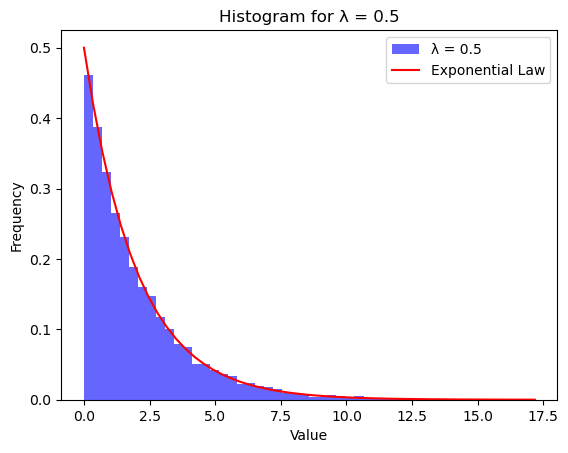

λ is 1.0:
Average: 0.9918282358851742
Dispersion: 0.9849782956278567
XSquare: [0.06411566482916563, 66.3386488629688]
Distribution Match


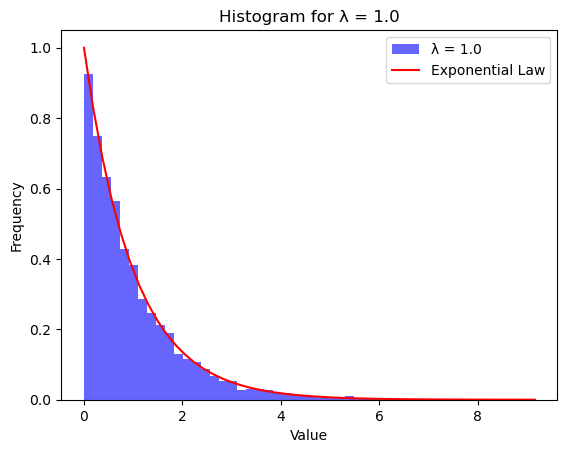

λ is 1.5:
Average: 0.6653728364558911
Dispersion: 0.45049561685965456
XSquare: [0.09924964897194093, 66.3386488629688]
Distribution Match


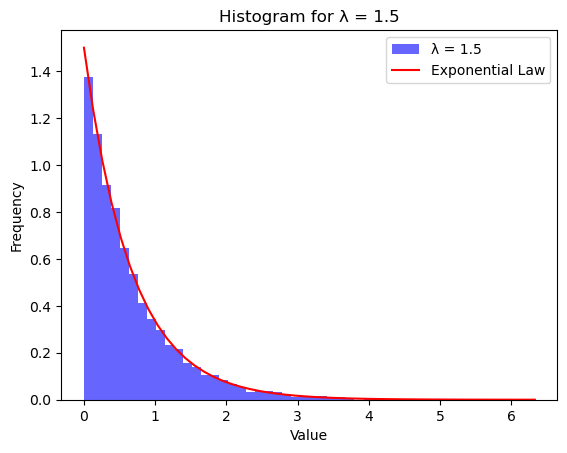

λ is 2.0:
Average: 0.4994791772180051
Dispersion: 0.2436726758337611
XSquare: [0.11192387493726563, 66.3386488629688]
Distribution Match


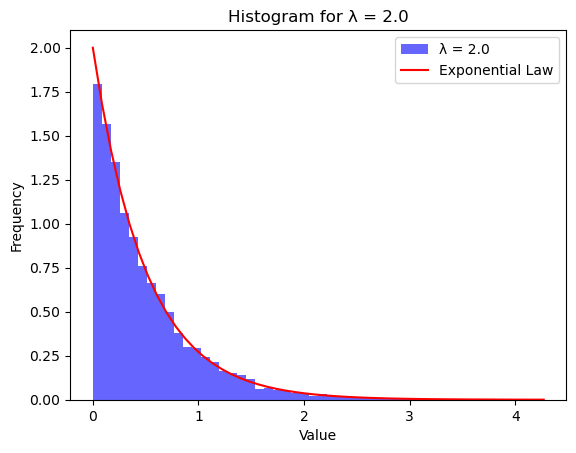

λ is 2.5:
Average: 0.3963061803810978
Dispersion: 0.15813503379611396
XSquare: [0.13846986801810024, 66.3386488629688]
Distribution Match


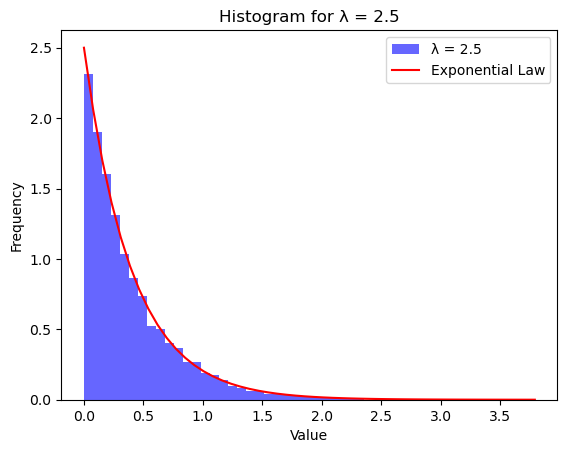

In [4]:
for lam in lamArr:
    rndNumbers = np.random.rand(numOf)
    rndENumbers = - (1 / lam) * np.log(rndNumbers)
    plt.hist(rndENumbers, bins=50, density=True, alpha=0.6, label=f'λ = {lam}', color='blue')
    xMax = np.max(rndENumbers)
    x = np.linspace(0, xMax, 50)
    expLaw = expon.pdf(x, scale=1/lam)
    plt.plot(x, expLaw, 'r-', label='Exponential Law')
    average = np.mean(rndENumbers)
    dispersion = np.var(rndENumbers)
    xsqrStats, xsqrCrit = xsquareExpTest(rndENumbers, 50, 0.05, lam, xMax)

    print(f'λ is {lam}:')
    print(f'Average: {average}')
    print(f'Dispersion: {dispersion}')
    print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
    if xsqrCrit >= xsqrStats:
        print('Distribution Match')
    else:
        print('Distibution Doesnt Match')
        
    plt.legend()
    plt.title(f'Histogram for λ = {lam}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Task 2

### Variables

In [5]:
numOf = 10000
aArr = [0, 2, 4] 
omegaArr = [1, 2, 3] 

### Define Functions

In [6]:
def xsquareTest(rndNumbers, numBins, alpha):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    eFrequency = norm.pdf(np.linspace(-3, 3, numBins))
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    return xsqrStats, xsqrCrit

def calculateUi():
    xiArr = np.random.rand(12)
    return np.sum(xiArr - 6)

def generateXArr(omega, a):
    mu = np.array([calculateUi() for _ in range(numOf)])
    return omega * mu + a

### Model Initialization

Omega is 1 and A is 0
Dispersion is 0.9926450624569095
Average is -65.99043808814383
XSquare: [0.4968164412986786, 42.55696780429269]
Distribution Match


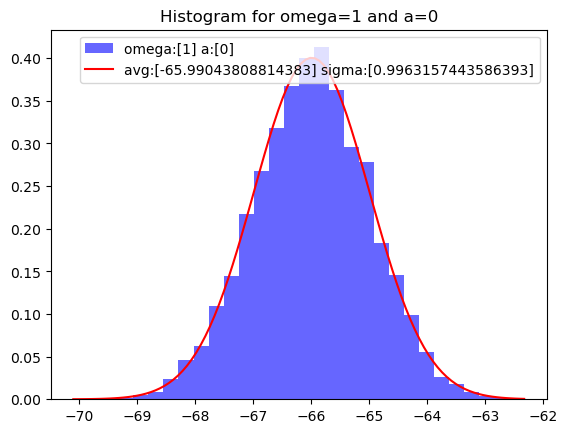

Omega is 2 and A is 0
Dispersion is 4.000049401087582
Average is -131.98924054819864
XSquare: [1.8167312723253846, 42.55696780429269]
Distribution Match


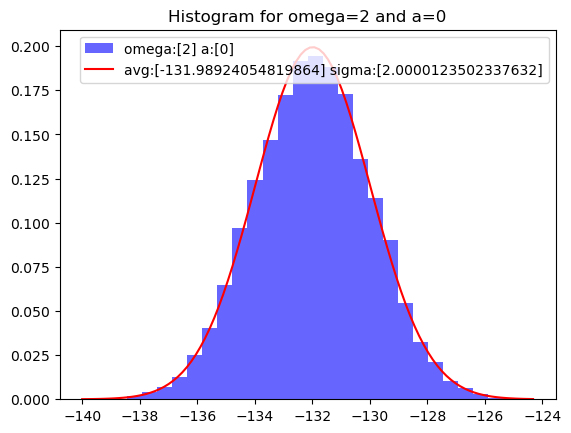

Omega is 3 and A is 0
Dispersion is 8.912575473777983
Average is -198.0333225325614
XSquare: [2.435555581049631, 42.55696780429269]
Distribution Match


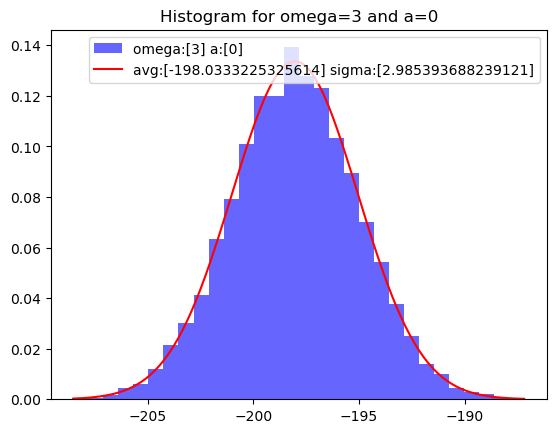

Omega is 1 and A is 2
Dispersion is 1.0230608578840692
Average is -63.99924532874713
XSquare: [0.6233526090918319, 42.55696780429269]
Distribution Match


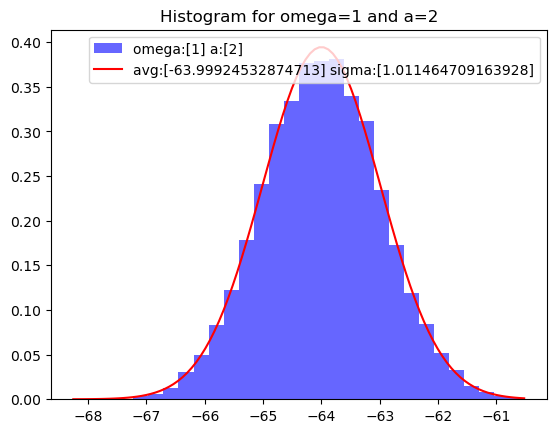

Omega is 2 and A is 2
Dispersion is 3.9198861251383654
Average is -129.96943094735784
XSquare: [1.4955786439021583, 42.55696780429269]
Distribution Match


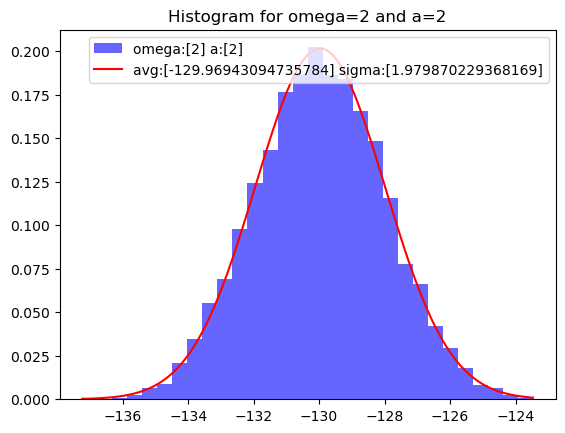

Omega is 3 and A is 2
Dispersion is 9.081881945584142
Average is -195.9943474246243
XSquare: [2.4977602145634146, 42.55696780429269]
Distribution Match


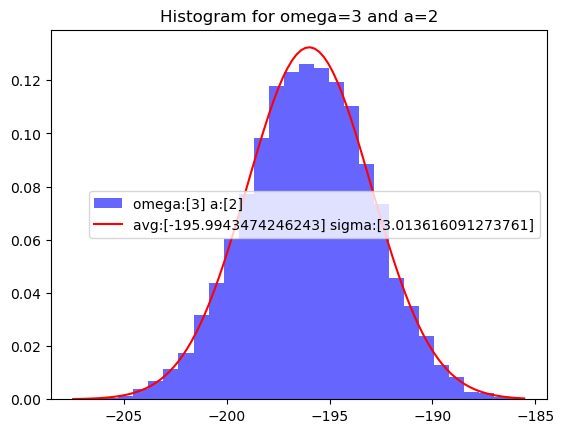

Omega is 1 and A is 4
Dispersion is 0.9953459998675251
Average is -61.99531443175387
XSquare: [0.3656652275198278, 42.55696780429269]
Distribution Match


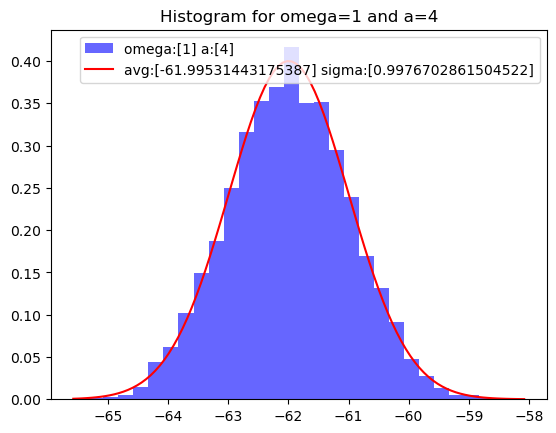

Omega is 2 and A is 4
Dispersion is 4.0338407392858295
Average is -127.9922327012954
XSquare: [1.6565756887115726, 42.55696780429269]
Distribution Match


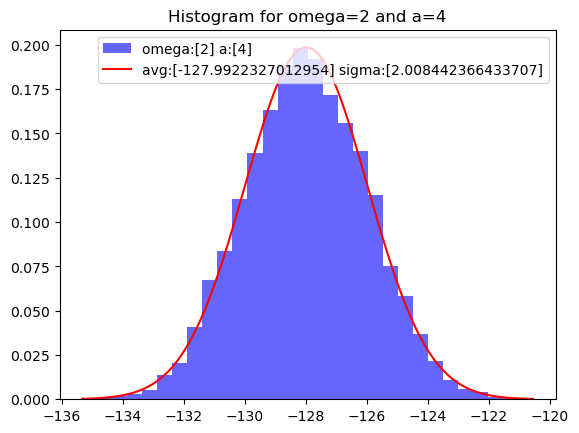

Omega is 3 and A is 4
Dispersion is 8.824414200835578
Average is -193.97618930465333
XSquare: [2.423195322355984, 42.55696780429269]
Distribution Match


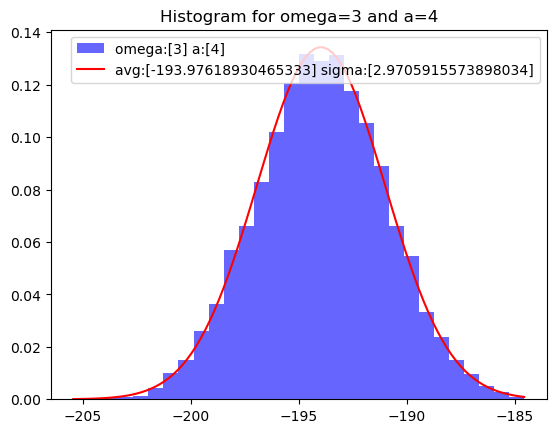

In [7]:
for a in aArr:
    for omega in omegaArr:
        xArr = generateXArr(omega, a)
        average = np.mean(xArr)
        dispersion = np.var(xArr)
        xRange = np.linspace(min(xArr), max(xArr), 100)
        normal = norm.pdf(xRange, loc=average, scale=np.sqrt(dispersion))
        plt.hist(xArr, bins=30, density=True, alpha=0.6, label=f'omega:[{omega}] a:[{a}]', color='blue')
        plt.plot(xRange, normal, 'r-', label=f'avg:[{average}] sigma:[{np.sqrt(dispersion)}]')
        xsqrStats, xsqrCrit = xsquareTest(xArr, 30, 0.05)
    
        print(f'Omega is {omega} and A is {a}')
        print(f'Dispersion is {dispersion}')
        print(f'Average is {average}')
        print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
        if xsqrCrit >= xsqrStats:
            print('Distribution Match')
        else:
            print('Distibution Doesnt Match')
        
        plt.legend()
        plt.title(f'Histogram for omega={omega} and a={a}')
        plt.show()

## Task 3

### Variables

In [8]:
numOf = 10000
aArr = [5**13, 5**5, 2**20]
cArr = [2**31, 2**13, 5**20]

### Define Functions

In [9]:
def generateNumbers(a, c, numOf):
    z = np.zeros(numOf)
    x = np.zeros(numOf)
    z[0] = 1
    
    for i in range(1, numOf):
        z[i] = (a * z[i-1]) % c
        x[i] = (z[i] + c) / c
        
    return x

def xsquareUniTest(rndNumbers, numBins, alpha):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    eFrequency = uniform.pdf(np.linspace(0, 1, numBins))
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    
    return xsqrStats, xsqrCrit

### Model Initialization

a is 1220703125 and c is 2147483648
Average: 1.497580249149585
Dispersion: 0.08416987448545102
XSquare: [25.021987836961678, 66.3386488629688]
Distribution Match


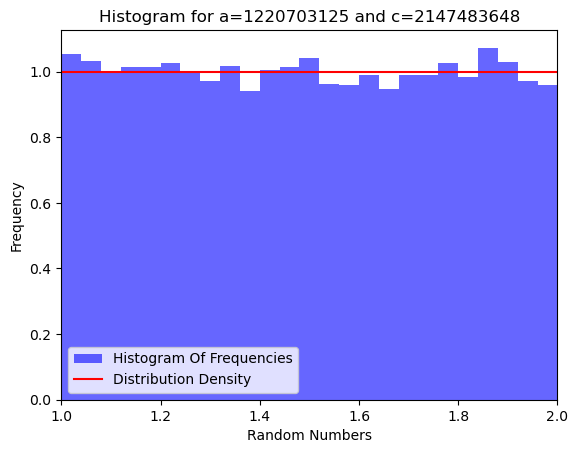

a is 1220703125 and c is 8192
Average: 1.4994638549804689
Dispersion: 0.08346614828940614
XSquare: [24.9959493549356, 66.3386488629688]
Distribution Match


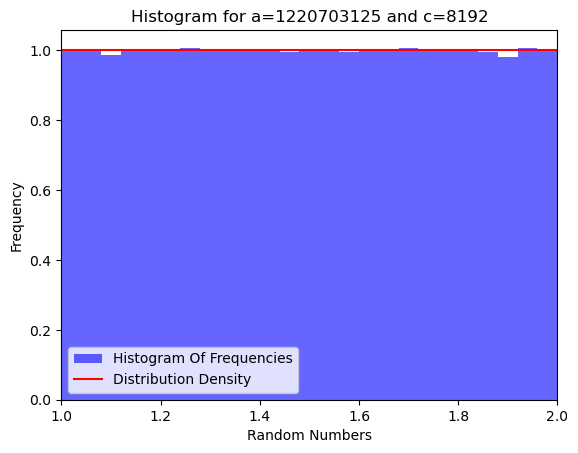

a is 1220703125 and c is 95367431640625
Average: 1.5021901143277019
Dispersion: 0.08285989679899056
XSquare: [25.061262500005146, 66.3386488629688]
Distribution Match


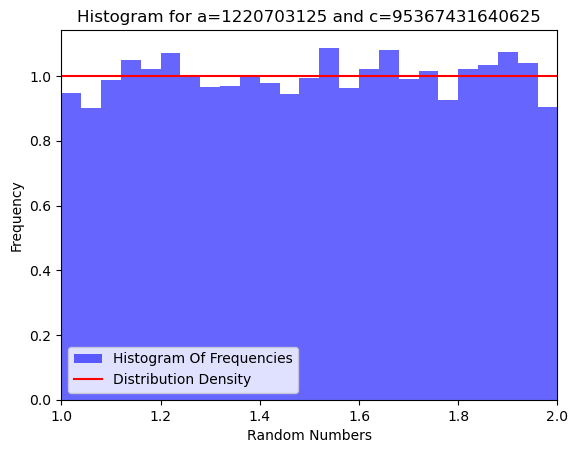

a is 3125 and c is 2147483648
Average: 1.500126409619255
Dispersion: 0.08409758902403969
XSquare: [25.05811840147092, 66.3386488629688]
Distribution Match


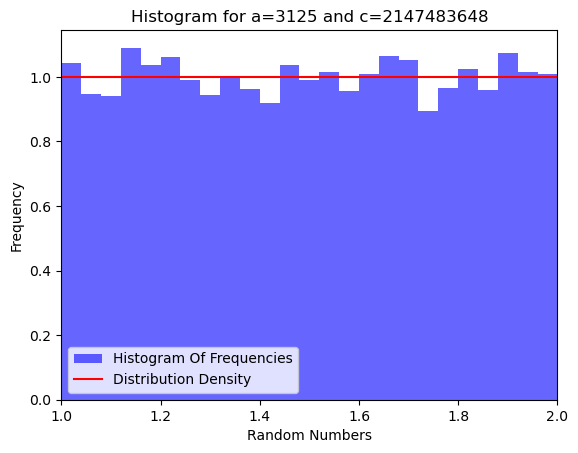

a is 3125 and c is 8192
Average: 1.4990232299804687
Dispersion: 0.08348452997054323
XSquare: [24.99669962966926, 66.3386488629688]
Distribution Match


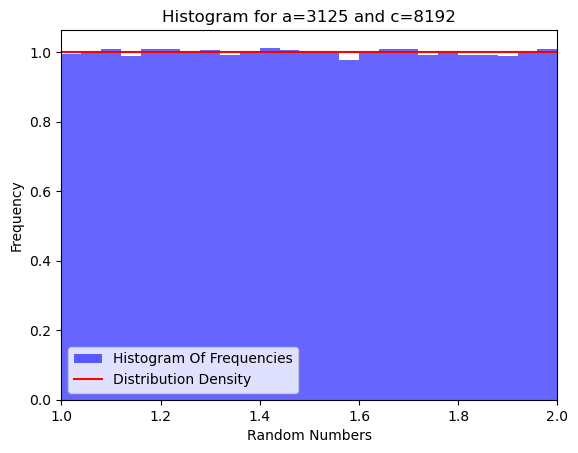

a is 3125 and c is 95367431640625
Average: 0.9999000320102434
Dispersion: 9.999001664102502e-05
XSquare: [2447.933127250185, 66.3386488629688]
Distibution Doesnt Match


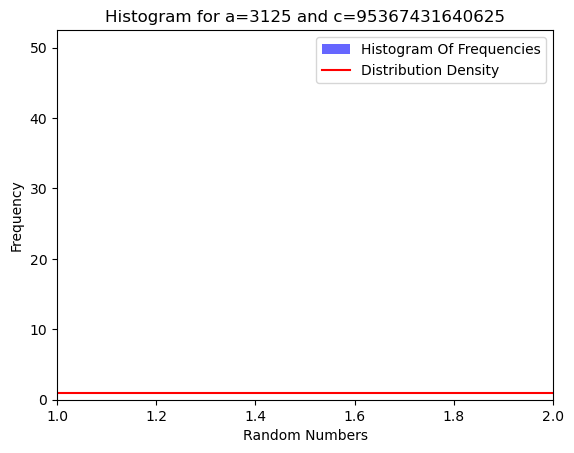

a is 1048576 and c is 2147483648
Average: 0.999900048828125
Dispersion: 9.999003360509871e-05
XSquare: [2447.1097228957115, 66.3386488629688]
Distibution Doesnt Match


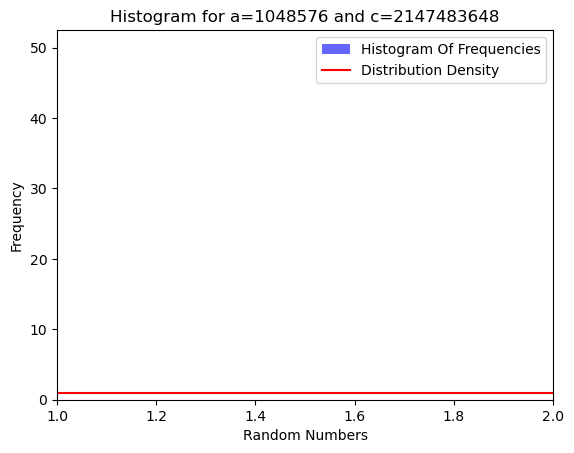

a is 1048576 and c is 8192
Average: 0.9999
Dispersion: 9.999000000000009e-05
XSquare: [2449.5000499999956, 66.3386488629688]
Distibution Doesnt Match


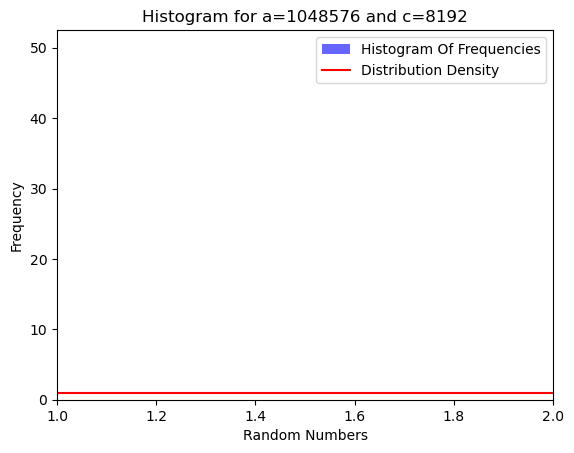

a is 1048576 and c is 95367431640625
Average: 1.4972834928358463
Dispersion: 0.0841714844042131
XSquare: [25.05064857327683, 66.3386488629688]
Distribution Match


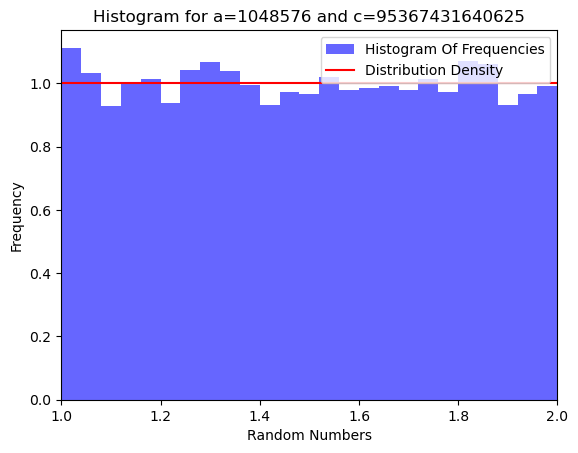

In [10]:
for a in aArr:
    for c in cArr:
        rndNumbers = generateNumbers(a, c, numOf)
        plt.hist(rndNumbers, bins=50, density=True, alpha=0.6, color='blue', label='Histogram Of Frequencies')
        average = np.mean(rndNumbers)
        dispersion = np.var(rndNumbers)
        xsqrStats, xsqrCrit = xsquareUniTest(rndNumbers, 50, 0.05)
        uni = uniform.pdf(np.linspace(0, 1, 50))
        plt.plot(np.linspace(1, 2, 50), uni, 'r-', label='Distribution Density')

        print(f'a is {a} and c is {c}')
        print(f'Average: {average}')
        print(f'Dispersion: {dispersion}')
        print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
        if xsqrCrit >= xsqrStats:
            print('Distribution Match')
        else:
            print('Distibution Doesnt Match')
        
        plt.xlim(1, 2)
        plt.legend()
        plt.xlabel('Random Numbers')
        plt.ylabel('Frequency')
        plt.title(f'Histogram for a={a} and c={c}')
        plt.show()